<a href="https://colab.research.google.com/github/PedroHudson/PUC_MVP1/blob/main/MVP_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MVP - Análise de Dados e Boas Práticas**


**1. Definiçao do Problema.**

Esse projeto visa analisar a arrecadaçao da Uniao Federal referente ao IPI (Imposto sobre Produtos Industrializados), no período de janeiro/2000 a março/2023. 

O IPI é um tributo federal, a competencia da arrecadacao é da Uniao, que pode altera-lo quando necessario para o controle da economia nacional.

Alem do seu objetivo principal que e arrecadacao, o Imposto sobre Produtos Industrializados é utilizado tambem como instrumento para impulsionar a competitividade dos produtos brasileiros no mercado internacional atraves da reducao dos custos da producao, regular o mercado por meio de alteracoes de alíquotas para aquecer a economia e incentivar ou desencorajar a populacao a consumir itens de determinado setor.  

O imposto incide sobre produtos industrializados, sejam eles nacionais ou importados, no entanto, o percentual do imposto tem variacao de acordo com a mercadoria. 

Para fins de impostos, sao considerados produtos industrializados aqueles que passam por qualquer procedimento que altere a natureza do produto, bem como seu funcionamento, acabamento e apresentacao. Alem disso, o imposto ainda se aplica a finalidade do produto e o seu aperfeicoamento para fins de consumo.

A análise do projeto será centrada em 3 categorias do imposto, IPI - Fumo, IPI - Bebidas e IPI - Automóveis, e iremos focar nos estados que compoe a regiao sudeste do país, que juntos geram a maior arrecadacao do Tesouro Nacional.

Para isso utilizaremos os dados disponíveis do Portal de Dados Abertos do Governo Federal.  

**2. Importacao das Bibliotecas e Configuracoes para nao receber Warnings, para Transformacoes Númericas e Categóricas.**

In [1]:
# Importacao do Pandas
import pandas as pd

# Importacao do Numpy
import numpy as np

# Importacao do Pyplot
import matplotlib.pyplot as plt

# Importacao de pacotes Matplotlib
from matplotlib import cm

# Importacao do Seaborn
import seaborn as sns

# Importacao do MissingNo para tratamento de missings
import missingno as ms 

# Transformacoes Númericas

# Normalizacao
from sklearn.preprocessing import MinMaxScaler 

# Padronizacao
from sklearn.preprocessing import StandardScaler

# Transformacoes Categóricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Configuracao para nao exibir Warnings
import warnings
warnings.filterwarnings('ignore')

**3. Importacao do Dataset.**

In [2]:
# Importando dados da url para um dataframe

# url a importar
url_dados = 'https://www.gov.br/receitafederal/dados/arrecadacao-estado.csv?raw=true'

# carga do dataset através da url
ipi = pd.read_csv(url_dados, sep=';', encoding='ISO-8859-1',decimal=',')

**4. Análise Exploratória - Primeiras Análises.**

In [3]:
# Visualizacao da quantidade de instancias e atributos do dataset
ipi.shape

(7533, 45)

In [4]:
# Visualizacao da quantidade de linhas por coluna
ipi.count()

Ano                                                             7533
Mês                                                             7533
UF                                                              7533
IMPOSTO SOBRE IMPORTAÇÃO                                        7533
IMPOSTO SOBRE EXPORTAÇÃO                                        7533
IPI - FUMO                                                      7533
IPI - BEBIDAS                                                   7533
IPI - AUTOMÓVEIS                                                7533
IPI - VINCULADO À IMPORTACAO                                    7533
IPI - OUTROS                                                    7533
IRPF                                                            7533
IRPJ - ENTIDADES FINANCEIRAS                                    7533
IRPJ - DEMAIS EMPRESAS                                          7533
IRRF - RENDIMENTOS DO TRABALHO                                  7533
IRRF - RENDIMENTOS DO CAPITAL     

*Observa-se que os itens que serao o foco da análise tem a mesma quantidade de linhas (IPI - Fumo, IPI - Bebidas e IPI - Automóveis).*

In [5]:
# Visualizacao dos tipos de dados 
ipi.dtypes

Ano                                                               int64
Mês                                                              object
UF                                                               object
IMPOSTO SOBRE IMPORTAÇÃO                                         object
IMPOSTO SOBRE EXPORTAÇÃO                                         object
IPI - FUMO                                                       object
IPI - BEBIDAS                                                    object
IPI - AUTOMÓVEIS                                                 object
IPI - VINCULADO À IMPORTACAO                                     object
IPI - OUTROS                                                     object
IRPF                                                             object
IRPJ - ENTIDADES FINANCEIRAS                                     object
IRPJ - DEMAIS EMPRESAS                                           object
IRRF - RENDIMENTOS DO TRABALHO                                  

*Com a visualizacao dos tipos de dados por atributo verificou-se que os itens que serao analisados estao classificados como tipo Object, portanto sera necessario fazer um tratamento para a transformacao dos dados em tipo Inteiro (int), permitindo assim a realizacao e visualizacao de um resumo estatistico dos atributos com valores numéricos.*

**5. Criacao do Dataframe a ser analisado, primeiras visualizacoes de dados.**

In [6]:
# Selecao das colunas para a criacao do novo dataframe
ipi_cols = ipi[['Ano', 'Mês', 'UF', 'IPI - FUMO', 'IPI - BEBIDAS', 'IPI - AUTOMÓVEIS']]

# Criacao de variável para a selecao dos Estados a serem analisados
sudeste = ['ES', 'MG', 'RJ', 'SP']

# Criacao do novo dataframe 
ipi_sud = ipi_cols[ipi_cols['UF'].isin(sudeste)]


In [7]:
# Visualizacao da quantidade de instancias e atributos do novo dataframe
ipi_sud.shape

(1116, 6)

In [8]:
# Visualizacao dos tipos de dados do novo dataframe
ipi_sud.dtypes

Ano                  int64
Mês                 object
UF                  object
IPI - FUMO          object
IPI - BEBIDAS       object
IPI - AUTOMÓVEIS    object
dtype: object

**6. Pré-processamento - Transformacoes dos dados.**

In [9]:
# Transformacao dos dados da coluna IPI - FUMO em Inteiro(int)
ipi_sud['IPI - FUMO']=ipi_sud['IPI - FUMO'].str.replace(',','').astype(int)

In [10]:
# Transformacao dos dados da coluna IPI - BEBIDAS em Inteiro(int)
ipi_sud['IPI - BEBIDAS']=ipi_sud['IPI - BEBIDAS'].str.replace(',','').astype(int)

In [11]:
# Transformacao dos dados da coluna IPI - AUTOMÓVEIS em Inteiro(int)
ipi_sud['IPI - AUTOMÓVEIS']=ipi_sud['IPI - AUTOMÓVEIS'].str.replace(',','').astype(int)

In [12]:
# Visualizacao dos tipos de dados apos o tratamento
ipi_sud.dtypes

Ano                  int64
Mês                 object
UF                  object
IPI - FUMO           int64
IPI - BEBIDAS        int64
IPI - AUTOMÓVEIS     int64
dtype: object

In [13]:
# Visulizacao das primeiras linhas do dataframe
ipi_sud.head()

,Ano,Mês,UF,IPI - FUMO,IPI - BEBIDAS,IPI - AUTOMÓVEIS
7,2000,Janeiro,ES,3598736,20408,1503039
10,2000,Janeiro,MG,15511142,12111623,29305691
18,2000,Janeiro,RJ,24542326,30839175,4605
25,2000,Janeiro,SP,61452206,53883669,49619167
34,2000,Fevereiro,ES,3001093,136575,1664809


In [14]:
# Visualizacao dos ultimas linhas do dataframe
ipi_sud.tail()

,Ano,Mês,UF,IPI - FUMO,IPI - BEBIDAS,IPI - AUTOMÓVEIS
7504,2023,Fevereiro,SP,201563864,3814353816,1363010272
7513,2023,Março,ES,3377,301056286,1641472175
7516,2023,Março,MG,0,294817118,0
7524,2023,Março,RJ,64486121,1902391878,3120301205
7531,2023,Março,SP,37450835,203994968,0


In [15]:
# Visualizacao do resumo estatistico dos atributos com valores numericos
ipi_sud.describe()

,Ano,IPI - FUMO,IPI - BEBIDAS,IPI - AUTOMÓVEIS
count,1116.000000,1.116000e+03,1.116000e+03,1.116000e+03
mean,2011.129032,5.951517e+08,1.411326e+09,1.115334e+09
std,6.715581,1.400818e+09,2.187951e+09,1.775882e+09
min,2000.000000,-4.329186e+08,2.040800e+04,-5.424603e+07
25%,2005.000000,3.040137e+06,2.163670e+07,1.593019e+07
50%,2011.000000,2.452370e+07,1.131052e+08,1.421687e+08
75%,2017.000000,1.678287e+08,2.115941e+09,1.615561e+09
max,2023.000000,8.766459e+09,9.945420e+09,9.967381e+09


*Com o resumo estatístico verifica-se: (1) a maior média se refere ao IPI - Bebidas; (2) o maior desvio padrao acontece também no IPI - Bebidas; (3) o valor minimo e máximo encontram-se no IPI - Automóveis; (4) verifica-se também que o IPI - Fumo e o IPI - Automóveis tiveram como valor mínimo resultado negativo, isso acontece quando ocorrem compensaçoes e deducoes maiores que a arredacadacao.*

**7. Visualizacoes.**

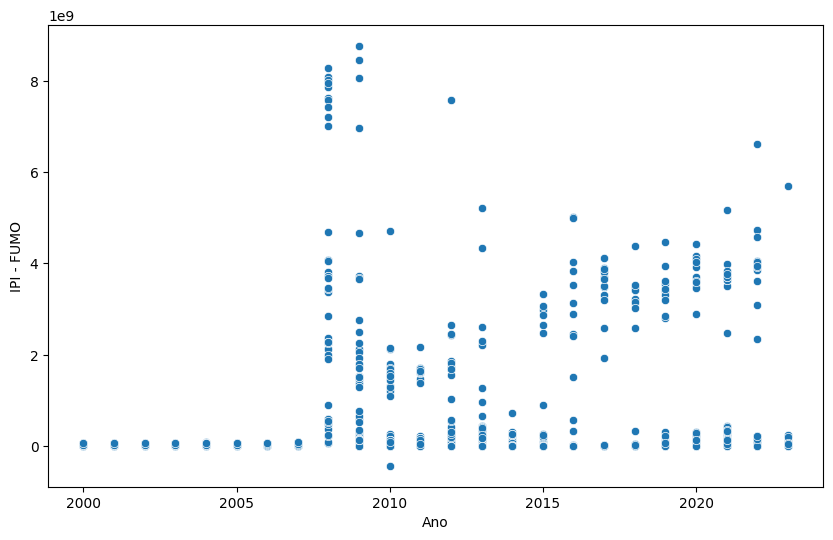

In [16]:
# Plotando o gráfico Scatter Plot com Seaborn (IPI - FUMO)
plt.figure(figsize = (10,6))
sns.scatterplot(x='Ano', y='IPI - FUMO', data=ipi_sud);

*O gráfico demonstra que houve um aumento substancial de arrecadacao no período da crise financeira da economia global de 2008, em 2014 houve uma reducao consideravel devido a crise financeira ocorrida no Brasil, nesse ano o governo utilizou a reducao da alíquota do imposto como instrumento para fomentar a economia. Nos anos seguintes houve um crescimento da arrecadacao.*

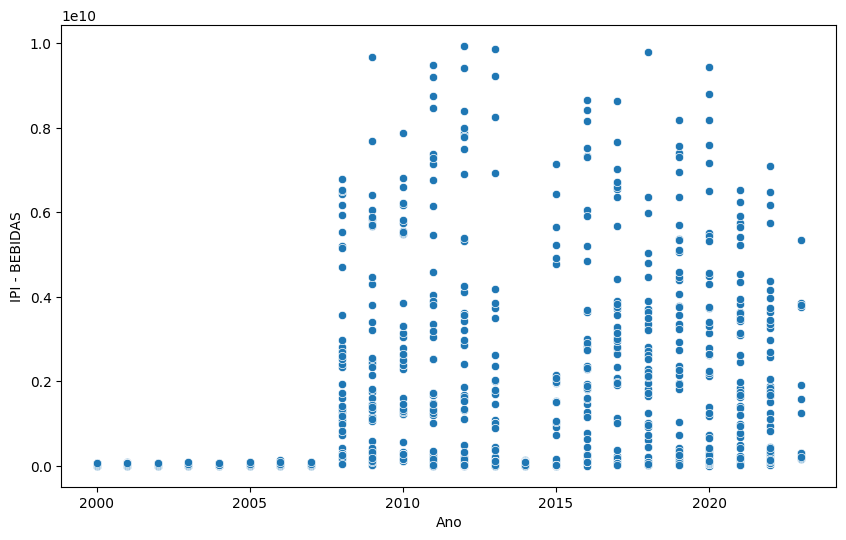

In [17]:
# Plotando o gráfico Scatter Plot com Seaborn (IPI - BEBIDAS)
plt.figure(figsize = (10,6))
sns.scatterplot(x='Ano', y='IPI - BEBIDAS', data=ipi_sud);

*Da mesma forma que o gráfico anterior, houve um aumento muito relevante na arredacao do imposto na crise de 2008, tendencia que se manteve nos demais anos, com excecao do ano de 2014, onde houve uma reducao drástica devido a crise politica e economica brasileira.*

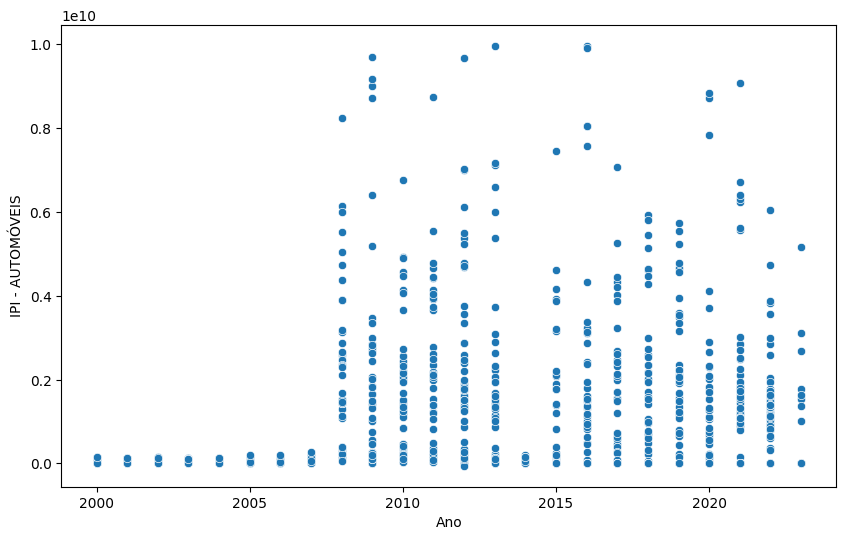

In [18]:
# Plotando o gráfico Scatter Plot com Seaborn (IPI - AUTOMÓVEIS)
plt.figure(figsize = (10,6))
sns.scatterplot(x='Ano', y='IPI - AUTOMÓVEIS', data=ipi_sud );

Seguindo a mesma rota dos impostos sobre fumo e bebidas, houve um aumento elevado de arrecadacao na crise financeira mundial de 2008, e isso se manteve nos demais anos, com excecao do ano de 2014.

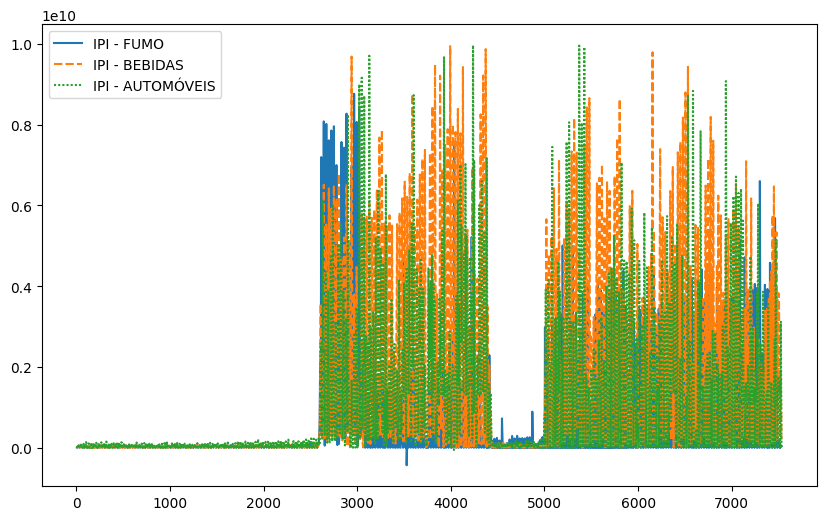

In [19]:
# Gráfico de linhas com Seaborn
plt.figure(figsize = (10,6))
sns.lineplot(data=ipi_sud.drop(['Ano'], axis=1));


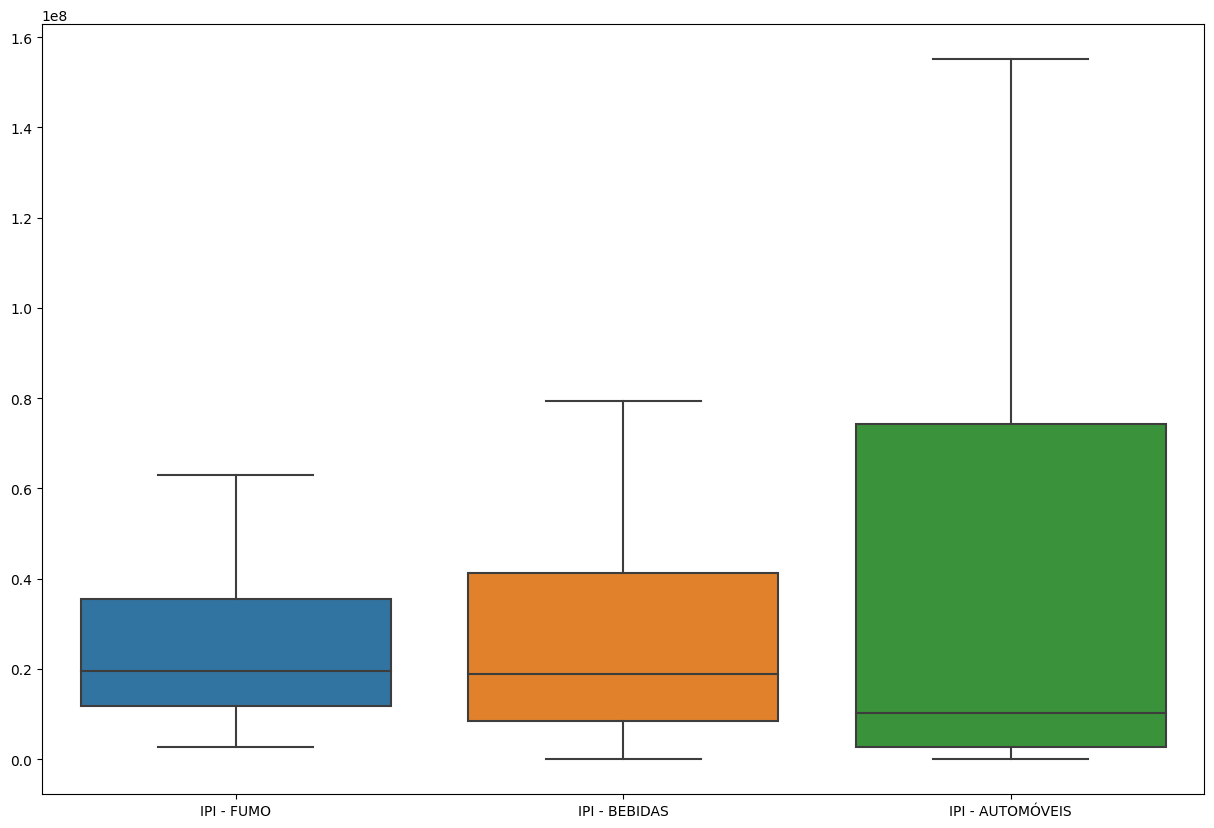

In [20]:
# Plotando boxplot com Seaborn para visualizacao do resultado das primeiras 100 linhas

# Selecao de colunas para a visualizacao
ipi_cols1 = ipi_sud[['IPI - FUMO', 'IPI - BEBIDAS', 'IPI - AUTOMÓVEIS']]

plt.figure(figsize = (15,10))
sns.boxplot(data=ipi_cols1[1:100]);

*Verificamos atraves do boxplot do periodo que o valor maximo arrecadado ocorreu no IPI - AUTOMÓVEIS, que possui tambem maior media que os demais impostos. Outro aspecto a se apontar é que a mediana do IPI - FUMO e do IPI - BEBIDAS sao similares.*

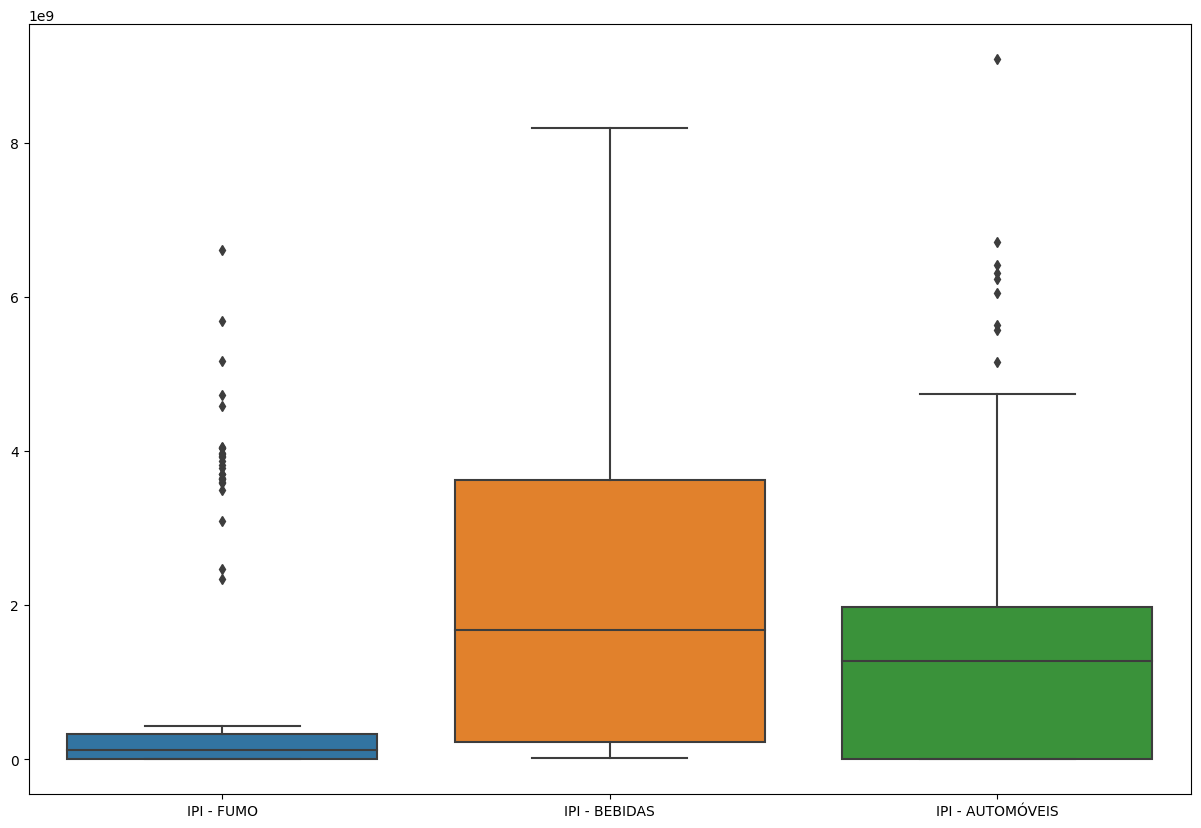

In [21]:
# Plotando boxplot com Seaborn para visualizacao do resultado das ultimas linhas

plt.figure(figsize = (15,10))
sns.boxplot(data=ipi_cols1[1000:1116]);

*Nesse novo periodo verificamos uma reducao da mediana do IPI - FUMO, e um aumento da mesma medida no IPI - BEBIDAS, que obteve tambem o maior valor. Visualizamos tambem que o IPI - FUMO e o IPI - AUTOMÓVEIS possuem possiveis outliers.*

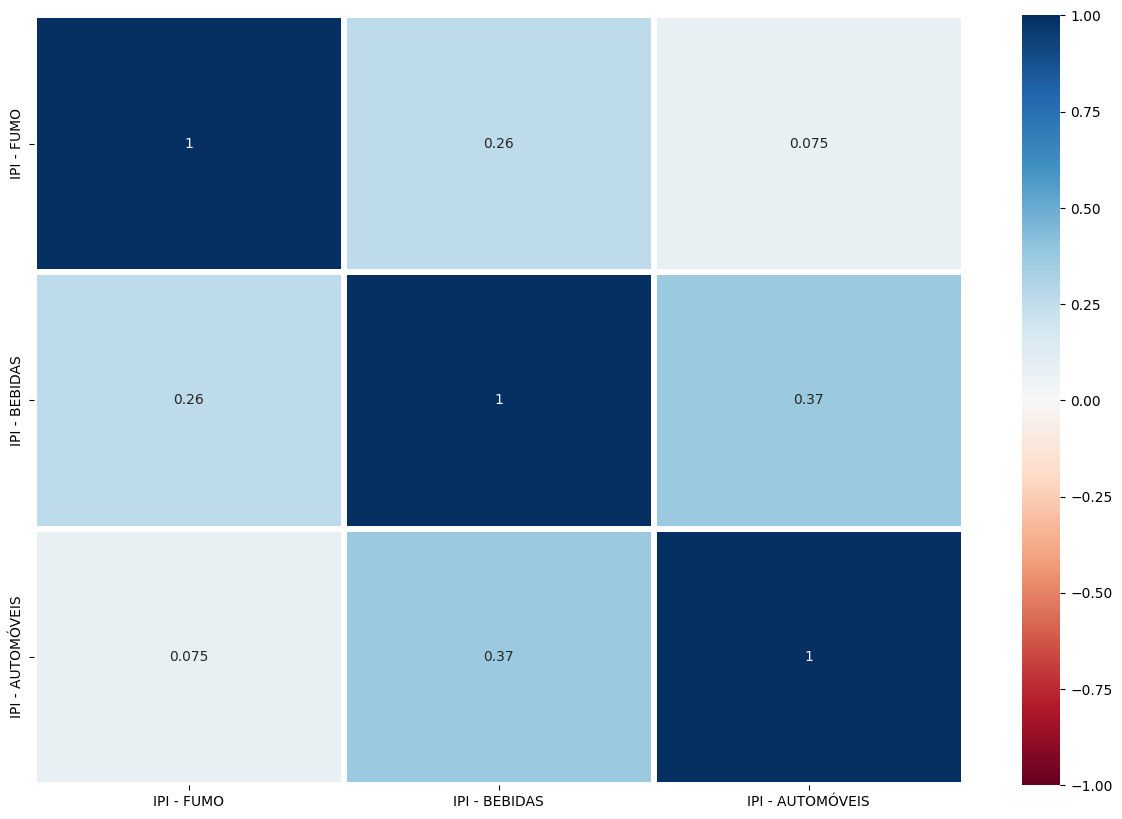

In [22]:
# Grafico de correlacao com Seaborn
plt.figure(figsize = (15,10))
sns.heatmap(ipi_cols1.corr(), annot=True, cmap= 'RdBu', vmin=-1, vmax=1, linewidths=3,linecolor='white');


*O gráfico indica que os impostos possuem correlacoes positivas, portanto uma variável tende a aumentar quando outra aumenta.*

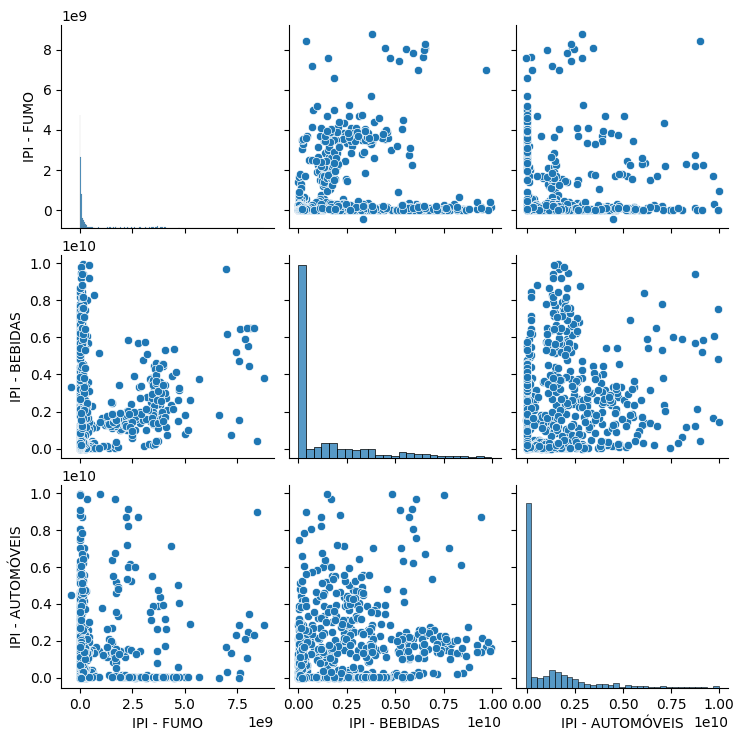

In [23]:
# Plotando pair plot 1 com Seaborn para visualizacao em uma so figura do histograma da diagonal principal e do scatterplot
sns.pairplot(ipi_cols1);

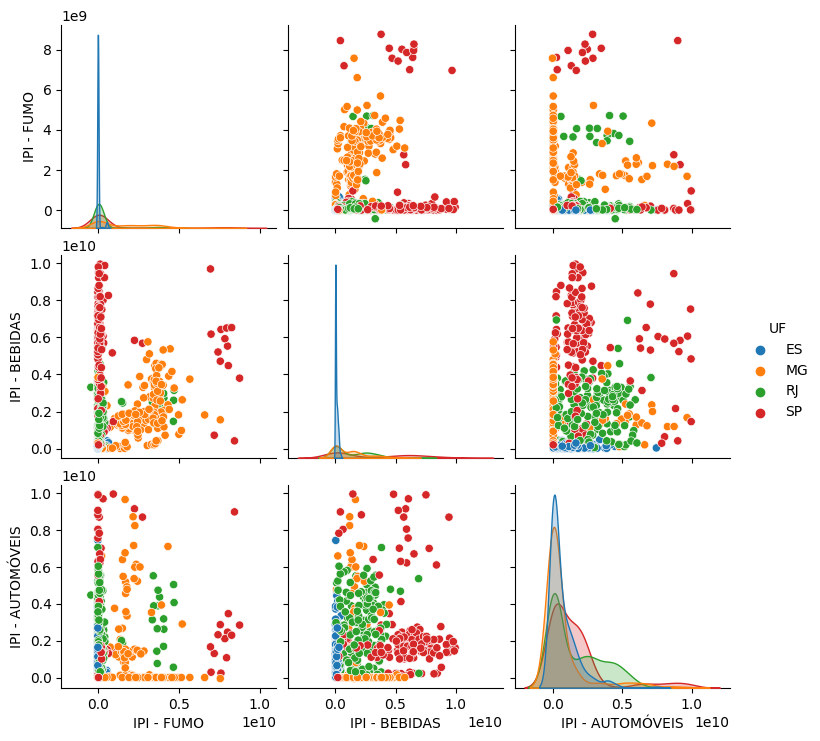

In [24]:
# Plotando pair plot 2 com Seaborn configurando o parametro hue

# Selecao de colunas para a visualizacao
ipi_cols2 = ipi_sud[['UF', 'IPI - FUMO', 'IPI - BEBIDAS', 'IPI - AUTOMÓVEIS']]

sns.pairplot(ipi_cols2, hue='UF');

Com as visualizacoes acima verificamos que os estados que obtiveram a maior arrecadacao foram de Sao Paulo e Minas Gerais, e que existe uma correlacao maior entre a arrecadacao do IPI - BEBIDAS e o IPI - AUTOMÓVEIS.

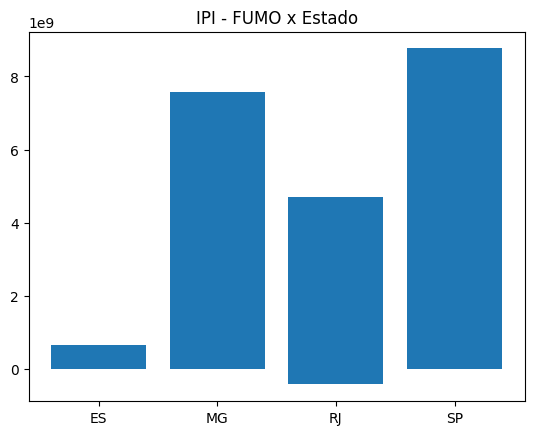

In [25]:
# Gráfico de barras: IPI - FUMO x UF
plt.bar(ipi_cols2['UF'], ipi_cols2['IPI - FUMO'])
plt.title('IPI - FUMO x Estado');




*Verificamos que o Estado de Sao Paulo teve a maior arrecadacao do imposto.*

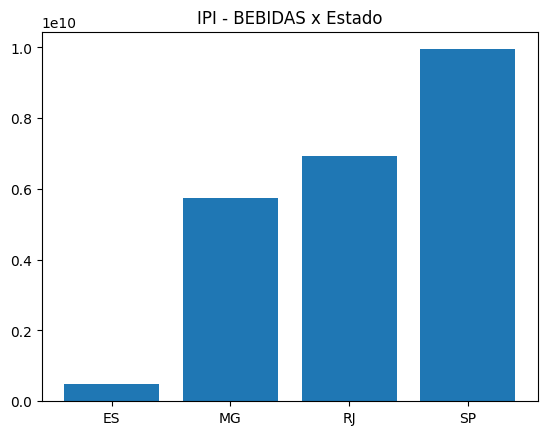

In [26]:
# Gráfico de barras: IPI - BEBIDAS x UF
plt.bar(ipi_cols2['UF'], ipi_cols2['IPI - BEBIDAS'])
plt.title('IPI - BEBIDAS x Estado');

*Nesse grafico verificamos que Sao Paulo mantem a lideranca na arrecadacao, seguido pelo Rio de Janeiro.*

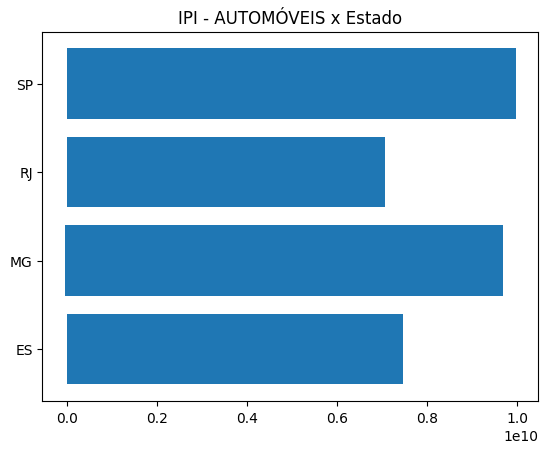

In [27]:
# Apenas para diversificar, utilizaremos o grafico de barras horizontal para demonstrar a arrecadacao do IPI - AUTOMÓVEIS x UF
plt.barh(ipi_cols2['UF'], ipi_cols2['IPI - AUTOMÓVEIS'])
plt.title('IPI - AUTOMÓVEIS x Estado');

*O grafico demonstra um empate técnico na arrecadacao entre os estado de Sao Paulo contra o Estado de Minas Gerais.*

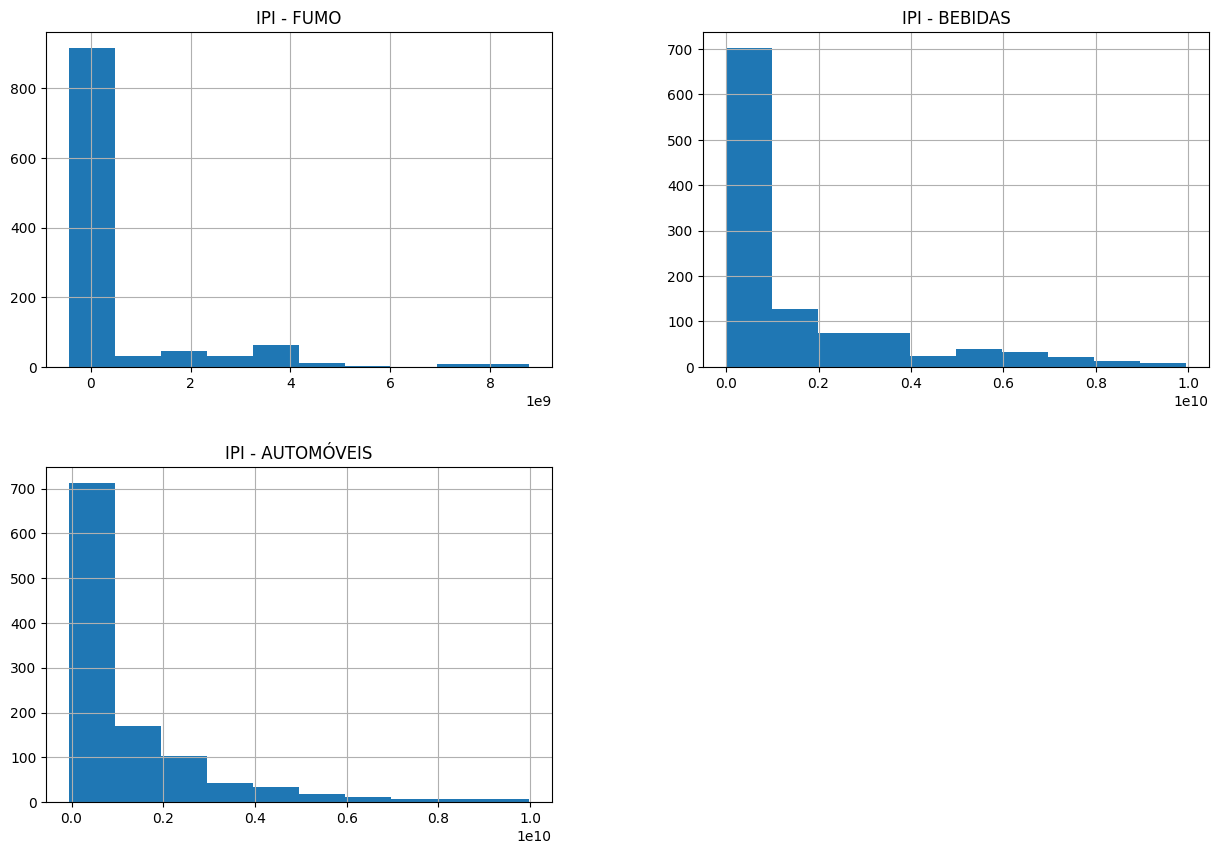

In [48]:
# Histograma 
ipi_cols2.hist(figsize = (15,10))
plt.show()

*Os gráficos demonstram a distribuicao das frequencias, que sao assimetricas pois possuem apenas um pico.*